In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Định nghĩa thư mục lưu trữ dữ liệu
data_dir = "data"
csv_filename = "TSLA.csv"  # Đặt tên file
csv_filepath = os.path.join(data_dir, csv_filename)


In [3]:
# Tạo thư mục nếu chưa tồn tại
if not os.path.exists(data_dir):
    os.makedirs(data_dir)


In [4]:
# Kiểm tra xem tệp đã tồn tại trong thư mục hiện tại hay chưa
if os.path.exists(csv_filepath):
    # Nếu tệp đã tồn tại, đọc dữ liệu từ tệp
    sp500 = pd.read_csv(csv_filepath, index_col='Date', parse_dates=True)
else:
    # Nếu chưa có file csv xuất hiện trong thư mục  thì tải dữ liệu thực tế từ Yahoo Finance
    ticker = "TSLA"
    start_date = "2024-01-01" # Ngày bắt đầu của dữ liệu
    end_date = "2024-04-30" # Ngày kết thúc của dữ liệu
    sp500 = yf.download(ticker, start=start_date, end=end_date)
    # Lưu dữ liệu vào tệp CSV
    sp500.to_csv(csv_filepath)

In [5]:
# Tạo các cột 'Moving Average' với kỳ hạn 50 ngày cho các giá trị 'Open', 'High', 'Low', 'Close', 'Volume'
for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
    sp500[f'{column} Moving Average'] = sp500[column].rolling(window=30).mean()

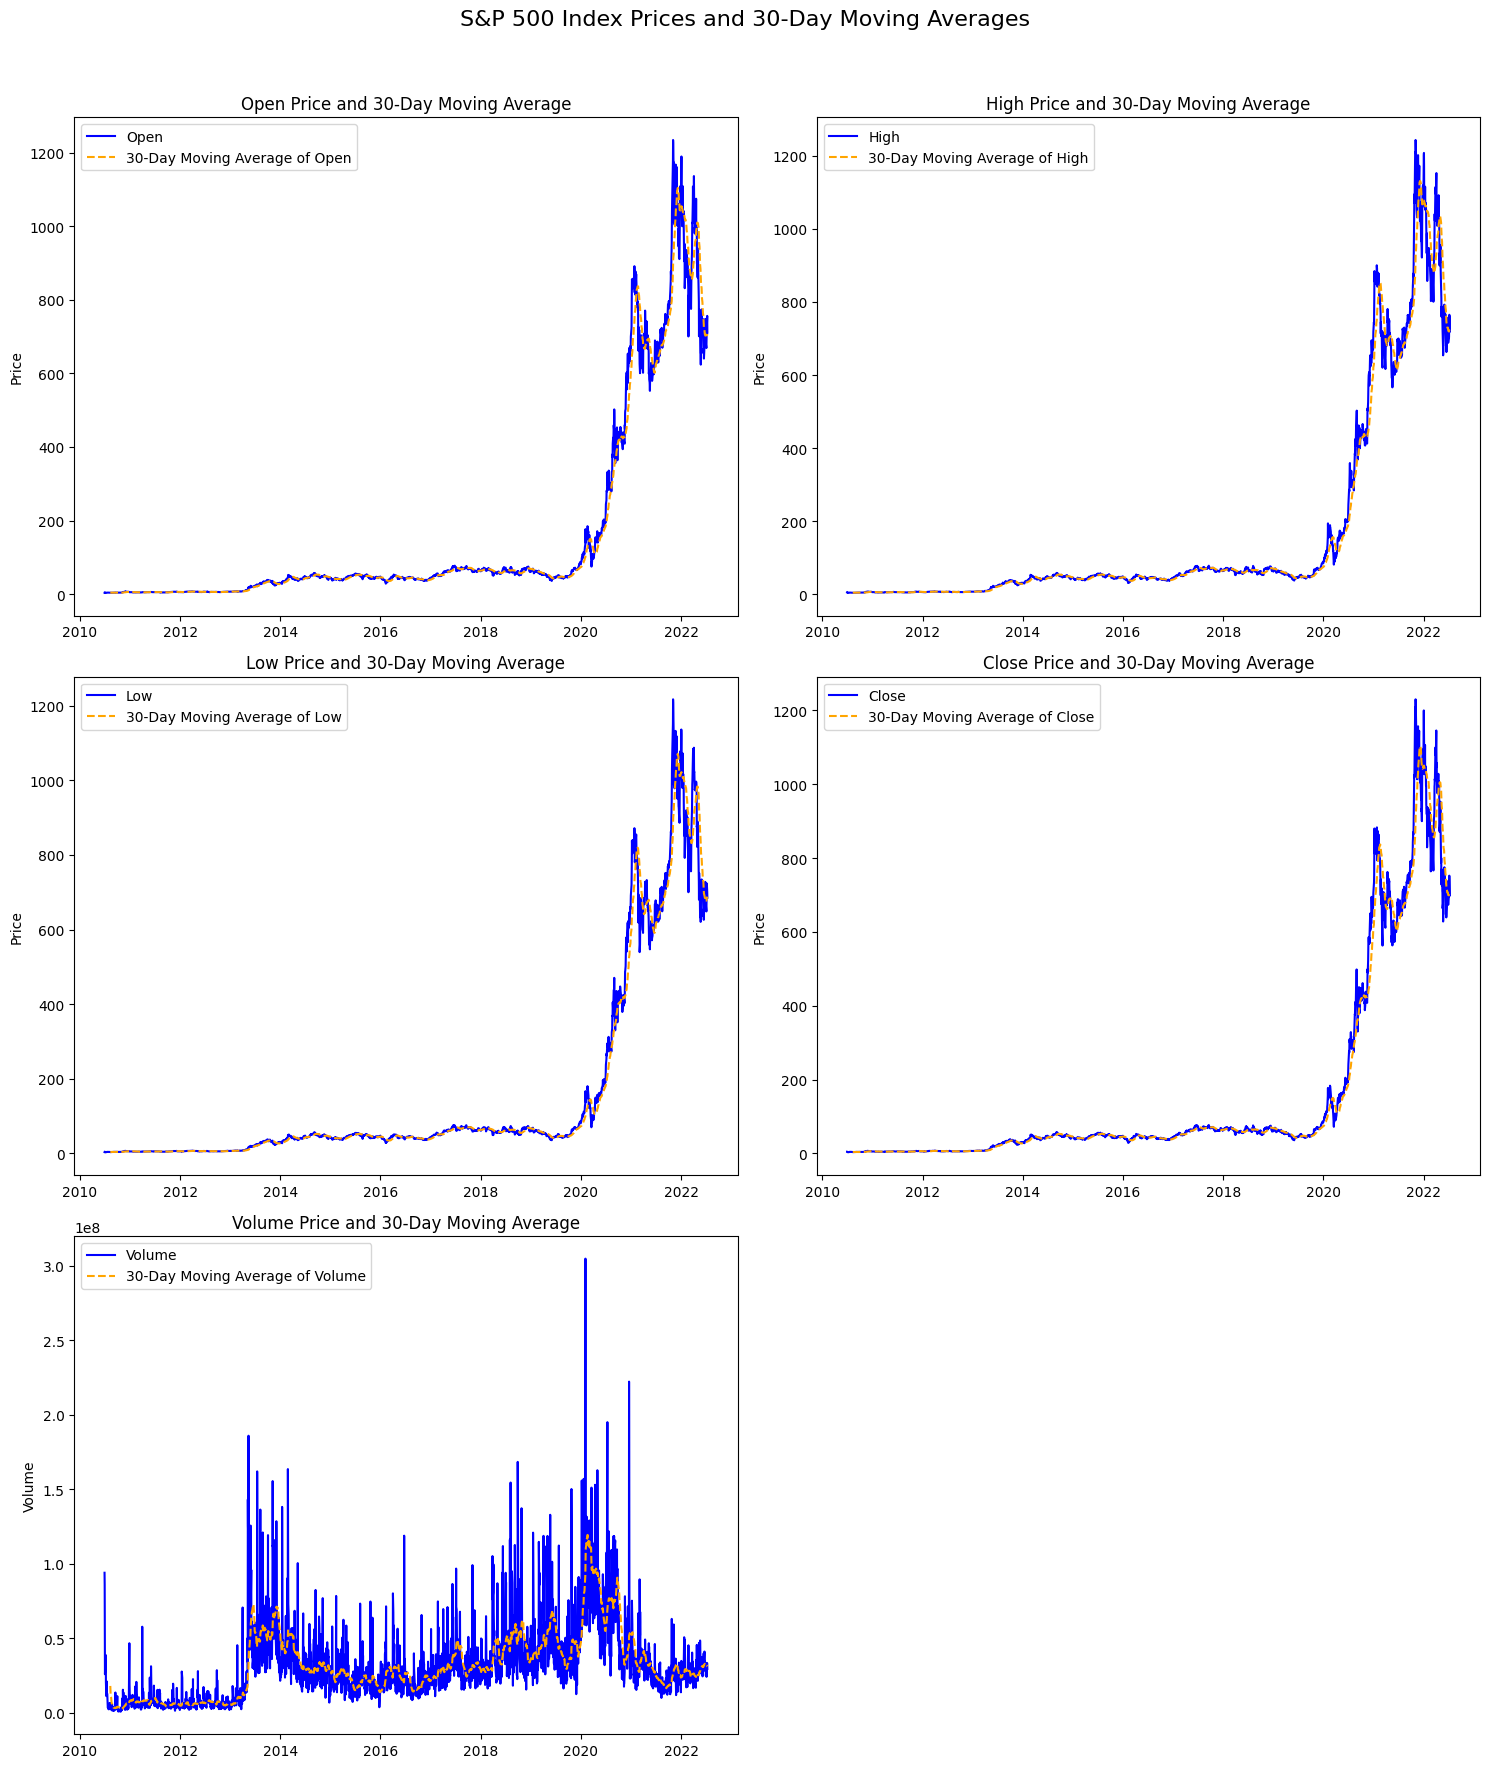

In [6]:
# Vẽ biểu đồ giá trị và trung bình di động cho từng cột
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
fig.suptitle(f'S&P 500 Index Prices and 30-Day Moving Averages', fontsize=16)

columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    ax.plot(sp500[column], label=f'{column}', color='blue')
    ax.plot(sp500[f'{column} Moving Average'], label=f'30-Day Moving Average of {column}', color='orange', linestyle='--')
    ax.set_title(f'{column} Price and 30-Day Moving Average')
    ax.set_ylabel('Price' if column != 'Volume' else 'Volume')
    ax.legend()
# Ẩn trục của ô trống
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [7]:
# Dự báo giá tiếp theo bằng cách sử dụng Trung bình di động
# Lấy giá trị Trung bình di động cuối cùng cho mỗi cột làm dự báo
forecast = {}
for column in columns:
    forecast[column] = sp500[f'{column} Moving Average'].iloc[-1]
    print(f'Dự báo giá tiếp theo của {column} bằng phương pháp Moving Average là: {forecast[column]}')

Dự báo giá tiếp theo của Open bằng phương pháp Moving Average là: 706.8936645507813
Dự báo giá tiếp theo của High bằng phương pháp Moving Average là: 727.6420003255208
Dự báo giá tiếp theo của Low bằng phương pháp Moving Average là: 688.1133361816406
Dự báo giá tiếp theo của Close bằng phương pháp Moving Average là: 707.5289998372396
Dự báo giá tiếp theo của Volume bằng phương pháp Moving Average là: 31127143.333333332


In [8]:
# Đánh giá mô hình bằng cách so sánh dự báo với dữ liệu thực tế
results = {}
for column in columns:
    # Loại bỏ các giá trị NaN do tính toán rolling mean
    actual = sp500[column].iloc[49:]  # Dữ liệu thực tế
    predicted = sp500[f'{column} Moving Average'].iloc[49:]  # Dự báo từ moving average
    
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    
    results[column] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

    print(f'Đánh giá mô hình dự báo cho {column}:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print('-'*50)

Đánh giá mô hình dự báo cho Open:
Mean Absolute Error (MAE): 14.95718573570838
Mean Squared Error (MSE): 1479.7426316406388
Root Mean Squared Error (RMSE): 38.46742299193746
--------------------------------------------------
Đánh giá mô hình dự báo cho High:
Mean Absolute Error (MAE): 15.145437107565524
Mean Squared Error (MSE): 1521.2138466757478
Root Mean Squared Error (RMSE): 39.00274152768941
--------------------------------------------------
Đánh giá mô hình dự báo cho Low:
Mean Absolute Error (MAE): 14.712711768066084
Mean Squared Error (MSE): 1419.7852830474121
Root Mean Squared Error (RMSE): 37.680038256979145
--------------------------------------------------
Đánh giá mô hình dự báo cho Close:
Mean Absolute Error (MAE): 14.878452496111137
Mean Squared Error (MSE): 1469.9201222850104
Root Mean Squared Error (RMSE): 38.339537324868836
--------------------------------------------------
Đánh giá mô hình dự báo cho Volume:
Mean Absolute Error (MAE): 10980757.85306944
Mean Squared E